# Dataset:USA Housing Listings 

https://www.kaggle.com/austinreese/usa-housing-listings

# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

# Импорт датасета

In [2]:
data = pd.read_csv('D:/Datasets/dataset_housing/housing.csv')

# Первичная информация о данных

In [3]:
#первые 5 строк
data.head() 

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [4]:
#число строк и столбцов
data.shape

(384977, 22)

Датасет содержит 384977 строк и 22 столбца

In [5]:
#Названия столбцов
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [6]:
#Краткая информация для каждого столбца
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,384977.0,7.040982e+09,8.800376e+06,7.003808e+09,7.035979e+09,7.043320e+09,7.048426e+09,7.051292e+09
price,384977.0,8.825722e+03,4.462200e+06,0.000000e+00,8.050000e+02,1.036000e+03,1.395000e+03,2.768307e+09
sqfeet,384977.0,1.059900e+03,1.915076e+04,0.000000e+00,7.500000e+02,9.490000e+02,1.150000e+03,8.388607e+06
beds,384977.0,1.905345e+00,3.494572e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.100000e+03
baths,384977.0,1.480718e+00,6.180605e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,7.500000e+01
cats_allowed,384977.0,7.268902e-01,4.455574e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
dogs_allowed,384977.0,7.079176e-01,4.547206e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
smoking_allowed,384977.0,7.317710e-01,4.430381e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
wheelchair_access,384977.0,8.211140e-02,2.745347e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
electric_vehicle_charge,384977.0,1.287090e-02,1.127177e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [7]:
#Посмотрим асимметрию данных
data.skew()

id                          -1.097089
price                      620.241559
sqfeet                     409.945299
beds                       282.238038
baths                       10.101872
cats_allowed                -1.018461
dogs_allowed                -0.914490
smoking_allowed             -1.046286
wheelchair_access            3.044356
electric_vehicle_charge      8.643395
comes_furnished              4.222419
lat                          0.253839
long                        -0.045888
dtype: float64

Асимметрия используется для оценки симметричности\асимметричности данных.

Видим, что цена, площадь, количество кроватей, количество ванн имеют большую по модулю, большую нуля асимметрию. 

Значит данные имеют перекос вправо.

In [8]:
#общая информация по данным. Оценим количество пропущенных значений и типы данных в каждом столбце 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

Видим, что имеются типы данных: float, int, object

Таким образом, численных признаков: 13. Категориальных признаков: 9.

Видим, что имеются пропуски в столбцах: laundry_options, parking_options, description, lat, long.

# Null значения

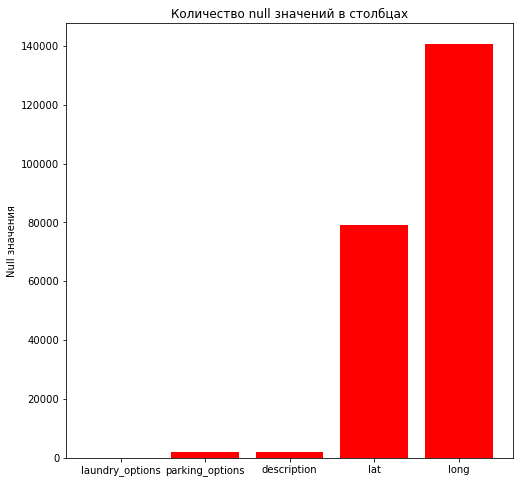

In [9]:
#Создадим пространоство для графика
fig, ax1 =  plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

#Найдем количество пропущенных значений и возьмем только те столбцы, где это значение больше 0
null_data = data.isnull().sum()
null_data = null_data[null_data > 0]
null_data.sort_values(inplace=True)
columns = ['laundry_options', 'parking_options', 'description', 'lat', 'long']

ax1.bar(x=columns, height=null_data, color='red')
ax1.set_title('Количество null значений в столбцах')
ax1.set_ylabel('Null значения');

Пропущенные значения только в 5 столбцах: laundry_options, parking_options, description, lat, long.

Из них 3 имеют тип данных object (laundry_options, parking_options, description).

И 2 имеют тип данных float (lat, long)

Проверим значения price и sqfeet на адекватность. Эти значения должны быть больше 0. 

In [10]:
#Найдем значения с значением площади <= 0
zeroSqeet_data = data[data['sqfeet'] <= 0]
zeroSqeet_data.shape[0]

48

Имеем 48 строк с отрицательным или нулевым значением площади.

In [11]:
#Найдем значения с значением цены <= 0
zeroPrice_data = data[data['price'] <= 0]
zeroPrice_data.shape[0]

1307

Имеем 1307 строк с отрицательным или нулевым значением цены.

# Обработка null значений

Для данных столбцов может подразумеваться, что парковки нет. Изменим данные значения на 'Отсутствует'

In [12]:
#Заменяем nan на значнеие отсутствия определенной опции или описания
data['parking_options'] = data['parking_options'].replace(np.nan, 'no parking')
data['laundry_options'] = data['laundry_options'].replace(np.nan, 'no laundry on site')
data['description'] = data['description'].replace(np.nan, 'no description')

Значения площади и цены зависят от типа жилья. Подставим средние значения относящиеся к каждому типу.

In [13]:
#Средние значения цены для каждого типа жилья
meanPrice_type = data.groupby('type')['price'].mean()

#Типы жилья
types = sorted(data['type'].unique())

for i in range(len(types)):
    data.loc[((data['type'] == types[i]) & (data['price'] <= 0), 'price')] = meanPrice_type[i]

In [14]:
#Средние значения площади для каждого типа жилья
meanSqfeet_type = data.groupby('type')['sqfeet'].mean()

#Типы жилья
types = sorted(data['type'].unique())

for i in range(len(types)):
    data.loc[((data['type'] == types[i]) & (data['sqfeet'] <= 0), 'sqfeet')] = meanSqfeet_type[i]

# Целевой признак

Целевым признаком выбран **Price**

In [15]:
data['price'].describe().T

count    3.849770e+05
mean     8.855591e+03
std      4.462200e+06
min      1.000000e+00
25%      8.100000e+02
50%      1.044000e+03
75%      1.400000e+03
max      2.768307e+09
Name: price, dtype: float64

Наша целевая функция - это непрерывная переменная со значениями в диапазоне от 1 до 2.768307e+09

Видим, что имеются выбросы. Построим boxplot для наглядной демонстрации.

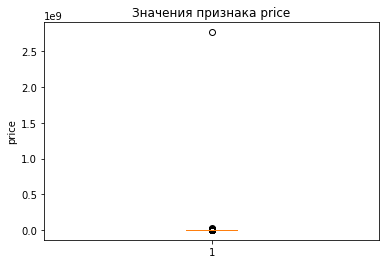

In [16]:
plt.boxplot(data['price'])
plt.ylabel('price')
plt.title('Значения признака price');

Согласно базовому определению выбросов **IQR**, значения меньше **Q1-1.5 * IQR** и значения выше **Q3 + 1.5 * IQR** рассматриваются как выбросы.

In [17]:
#найдем 25 и 75 квантили
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)

#расчет интерквартильного размаха
IQR = Q3 - Q1

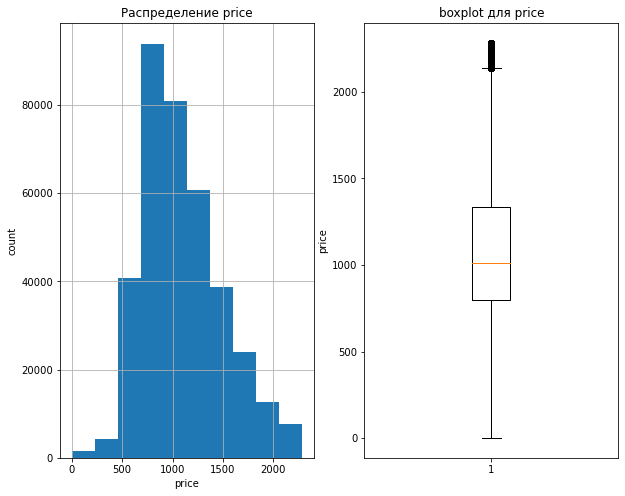

In [18]:
#отбираем данные, которые лежат от 25 квантиля до 75 квантиля
data_IQR = data[(data['price'] > (Q1-1.5*IQR)) & (data['price'] < (Q3+1.5*IQR))]

#cоздадим пространоство для графика
fig, (ax1, ax2) =  plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

#построим гистограмму
ax1.hist(x=data_IQR['price'])
ax1.set_xlabel('price')
ax1.set_ylabel('count')
ax1.grid()
ax1.set_title('Распределение price')

ax2.boxplot(x=data_IQR['price'])
ax2.set_ylabel('price')
ax2.set_title('boxplot для price')

plt.show()

Распределение признака price имеет перекос вправо

Медиана имеет меньшее значение чем среднее, так как имеется перекос вправо.

# Price и другие признаки

Исследуем воздействие признаков на целевой признак price

# Воздействие категориальных признаков

Исследуем зависимость цены от типа жилья

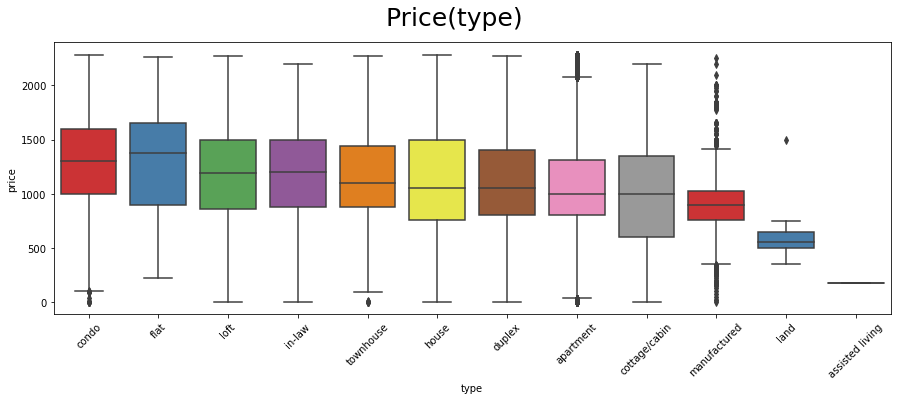

In [19]:
#выделяем пространство для графика
fig = plt.figure(figsize=(15,5))

#группируем данные по типу и считаем для каждой группы среднее
table = data_IQR.groupby(['type'], as_index=False)['price'].mean().sort_values(by='price', ascending=False)

#построение boxplot'а
ax = sns.boxplot(data=data_IQR, x="type", y="price", order=table['type'].to_list(), palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
fig.suptitle("Price(type) ",fontsize=25);

Выдвинем **гипотезу**, что математические ожидания цен разных типов жилья равны.

$$H_0: m_1 = m_2 = ... = m_k$$

Используем однофакторный дисперсионный анализ(ANOVA)

type - группировочный признак

price - результативный

В дисперсионном анализе выдвигаются следующие предположения:

1) все случайные величины X1,…, XK имеют нормальное распределение;

2) выборки из каждой группы являются независимыми;

3) дисперсии случайных величин X1,…,XK равны (такие случайные величины называются гомоскедастичными).

Исследуем распределения на нормальность. Воспользуемся критерием **Шапиро-Уилка**. Почему он? Потому что он один из самых мощных критериев и позволяет работать с выборкой данного размера. Выберем уровень значимости **alpha = 0.05**.

In [20]:
#Получаем список типов жилья, чтобы проверить выборки на нормальность
types = data_IQR['type'].unique()

for _ in types:
    if ((_ == 'townhouse') | (_ == 'assisted living')): #этих типов жилья меньше 3 и они не могут быть исследованы на нормальность
        continue
    stat, p_value = stats.shapiro(data_IQR[data_IQR['type'] == _]['price'])
    print(_, ': statistic  ', '%.3f' %stat, '  p_value ', '%.3f' %p_value, sep='')

D:\Anaconda\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


apartment: statistic  0.964  p_value 0.000
condo: statistic  0.989  p_value 0.000
house: statistic  0.965  p_value 0.000
duplex: statistic  0.970  p_value 0.000
loft: statistic  0.976  p_value 0.000
manufactured: statistic  0.969  p_value 0.000
cottage/cabin: statistic  0.964  p_value 0.000
flat: statistic  0.975  p_value 0.000
in-law: statistic  0.988  p_value 0.182
land: statistic  0.723  p_value 0.007


Видим, что нормальное распределение имеет только in-law.

Но **дисперсионный анализ** является слабо чувствительным (**робастным**) к требованию о нормальности распределения наблюдаемых случайных величин при больших объёмах выборок

Проведем оценку равенства дисперсий исследуемых метрик в группах. Пусть уровень значимости **alpha = 0.05**. Воспользуемся **критерием Левена**, потому что мы знаем, что наши данные имеют распределение отличное от нормального, исходя из предыдущего теста и позволяет работать с выборкой данного размера.

In [21]:
stats.levene(data_IQR[data_IQR['type'] == 'apartment']['price'],
                        data_IQR[data_IQR['type'] == 'condo']['price'],
                        data_IQR[data_IQR['type'] == 'house']['price'],
                        data_IQR[data_IQR['type'] == 'duplex']['price'],
                        data_IQR[data_IQR['type'] == 'loft']['price'],
                        data_IQR[data_IQR['type'] == 'manufactured']['price'],
                        data_IQR[data_IQR['type'] == 'cottage/cabin']['price'],
                        data_IQR[data_IQR['type'] == 'flat']['price'],
                        data_IQR[data_IQR['type'] == 'in-law']['price'],
                        data_IQR[data_IQR['type'] == 'land']['price'])

LeveneResult(statistic=550.332748331787, pvalue=0.0)

Выборки имеют различные дисперсии, так как **p_value < alpha**.

При нарушении требования их гомоскедастичности наблюдается рост вероятности ошибки второго рода.

Проведем однофакторный дисперсионный анализ:

In [22]:
stats.f_oneway(data_IQR[data_IQR['type'] == 'apartment']['price'],
               data_IQR[data_IQR['type'] == 'condo']['price'],
               data_IQR[data_IQR['type'] == 'house']['price'],
               data_IQR[data_IQR['type'] == 'duplex']['price'],
               data_IQR[data_IQR['type'] == 'loft']['price'],
               data_IQR[data_IQR['type'] == 'manufactured']['price'],
               data_IQR[data_IQR['type'] == 'cottage/cabin']['price'],
               data_IQR[data_IQR['type'] == 'flat']['price'],
               data_IQR[data_IQR['type'] == 'in-law']['price'],
               data_IQR[data_IQR['type'] == 'land']['price'])

F_onewayResult(statistic=418.3730599561138, pvalue=0.0)

Получаем, что **гипотеза о равенстве мат.ожиданий отвергается**.

Узнаем какие именно математические ожидания значимо отличаются, а какие равны.

$$H_0: m_i = m_j, i=1..k, j=1..k$$

$$H_1: m_i <> m_j, i=1..k, j=1..k$$

Однако такой способ проверки имеет существенный недостаток. При проверке одной параметрической гипотезы задаётся некоторый уровень значимости α, определяющий вероятность ошибки первого рода, т.е. отклонения основной гипотезы при условии её истинности. При проверке множества параметрических гипотез, каждую на уровне значимости α, с использованием статистики критерия Стьюдента, вероятность ошибочно обнаружить различие в математических ожиданиях будет расти с числом проверяемых гипотез.

Используем **критерий Тьюки** используется для проверки нулевой гипотезы

$$H_0: m_i = m_j, i=1..k, j=1..k$$

$$H_1: m_i <> m_j, i=1..k, j=1..k$$

Благодаря тому обстоятельству, что **в формулу вычисления стандартной ошибки входит внутригрупповая дисперсия, обеспечивается контроль над групповой вероятностью ошибки первого рода**. Именно это делает критерий Тьюки подходящим критерием для выполнения большого числа попарных сравнений групповых средних.

In [23]:
#перегоняем данные о ценах на жилье в отдельные dataframes для удобства
x1_df = pd.DataFrame({'apartment': data_IQR[data_IQR['type'] == 'apartment']['price'].values})
x2_df = pd.DataFrame({'condo': data_IQR[data_IQR['type'] == 'condo']['price'].values})
x3_df = pd.DataFrame({'house': data_IQR[data_IQR['type'] == 'house']['price'].values})
x4_df = pd.DataFrame({'duplex': data_IQR[data_IQR['type'] == 'duplex']['price'].values})
x5_df = pd.DataFrame({'loft': data_IQR[data_IQR['type'] == 'loft']['price'].values})
x6_df = pd.DataFrame({'manufactured': data_IQR[data_IQR['type'] == 'manufactured']['price'].values})
x7_df = pd.DataFrame({'cottage/cabin': data_IQR[data_IQR['type'] == 'cottage/cabin']['price'].values})
x8_df = pd.DataFrame({'flat': data_IQR[data_IQR['type'] == 'flat']['price'].values})
x9_df = pd.DataFrame({'in-law': data_IQR[data_IQR['type'] == 'in-law']['price'].values})
x10_df = pd.DataFrame({'land': data_IQR[data_IQR['type'] == 'land']['price'].values})

#загоняем их все в один dataframe
df = pd.concat([x1_df, x2_df, x3_df, x4_df, x5_df, x6_df, x7_df, x8_df, x9_df, x10_df], axis=1)

In [24]:
#посмотрим что получлось
df.head()

,apartment,condo,house,duplex,loft,manufactured,cottage/cabin,flat,in-law,land
0,1148.0,1200.0,2195.0,1495.0,1675.0,1025.0,1300.0,1795.0,925.0,1500.0
1,1813.0,1295.0,1899.0,1050.0,1800.0,1350.0,1200.0,1100.0,1375.0,350.0
2,1095.0,995.0,895.0,1395.0,1100.0,945.0,1000.0,1595.0,1295.0,550.0
3,289.0,1625.0,1595.0,1395.0,1500.0,1150.0,1509.0,1200.0,1495.0,550.0
4,1093.0,1100.0,1195.0,995.0,1375.0,1130.0,1300.0,1550.0,1625.0,500.0


In [25]:
#последняя подготовка данных для попарных сравнений
stacked_data = df.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'id',
                                            'level_1': 'x',
                                            0:'result'})
print(stacked_data.head())

   id          x  result
0   0  apartment  1148.0
1   0      condo  1200.0
2   0      house  2195.0
3   0     duplex  1495.0
4   0       loft  1675.0


In [26]:
#рассчитаем все попарные сравнения с доверительными интервалами TukeyHSD
MultiComp = pairwise_tukeyhsd(stacked_data['result'], stacked_data['x'])
print(MultiComp)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1        group2     meandiff p-adj    lower      upper   reject
------------------------------------------------------------------------
    apartment         condo  243.3665  0.001   226.1959  260.5372   True
    apartment cottage/cabin -126.9306  0.001  -170.8736  -82.9877   True
    apartment        duplex   40.8855  0.001     22.649    59.122   True
    apartment          flat  233.0574  0.001    174.404  291.7108   True
    apartment         house   57.5173  0.001    49.8971   65.1376   True
    apartment        in-law  122.9063 0.0028     25.173  220.6395   True
    apartment          land -411.0394  0.151  -882.5332   60.4543  False
    apartment          loft  147.4626  0.001    97.9078  197.0173   True
    apartment  manufactured -174.0826  0.001   -193.555 -154.6103   True
        condo cottage/cabin -370.2972  0.001  -417.3673  -323.227   True
        condo        duplex  -202.481  0.001  -227.

Если поле reject == False значит мат. ожидания равны, так как доверительным интервалом накрывывается значение 0.

Таким образом, мат. ожидания цен совпадают у следующих типов жилья:

In [27]:
print([('apartment', 'land'),
        ('condo', 'flat'),
        ('cottage/cabin', 'land'),
        ('cottage/cabin', 'manufactured'),
        ('duplex', 'house'),
        ('duplex', 'in-law'),
        ('duplex', 'land'),
        ('flat', 'in-law'),
        ('house', 'in-law'),
        ('house', 'land'),
        ('in-law', 'loft'),
        ('land', 'manufactured')])

[('apartment', 'land'), ('condo', 'flat'), ('cottage/cabin', 'land'), ('cottage/cabin', 'manufactured'), ('duplex', 'house'), ('duplex', 'in-law'), ('duplex', 'land'), ('flat', 'in-law'), ('house', 'in-law'), ('house', 'land'), ('in-law', 'loft'), ('land', 'manufactured')]


# --------------------------------------------------------------------------------------------------------

Проверим зависимость стоимости жилья от штата (северный / южный)

Южными штатами будем считать штаты, которые были в составе Конфедерации.

**P.S.:** Конфедеративные Штаты были противником Соединённых Штатов во время Гражданской войны в США

In [28]:
#создаем массивы северных и южных штатов
south = ['sc', 'ms', 'fl', 'al', 'ga', 'la', 'tx', 'va', 'ar', 'nc', 'tn', 'mo', 'az', 'ky']
north = []


#отбираем северные штаты
for _ in data_IQR['state'].unique():
    if _ not in south:
        north.append(_)

In [29]:
#создаем dataframe для южных штатов
data_IQR_South = data_IQR[data_IQR['state'].isin(south)]

#создаем dataframe для северных штатов
data_IQR_North = data_IQR[data_IQR['state'].isin(north)]

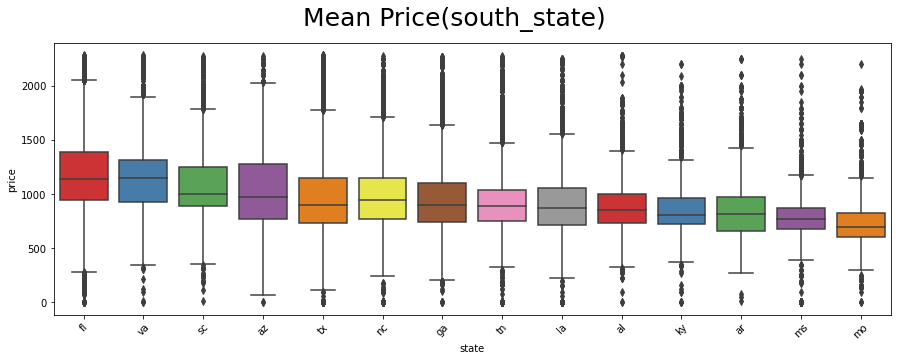

In [30]:
#создаем пространство для графика
fig = plt.figure(figsize=(15,5))

#группируем по южным штатам, считая среднюю стоимость жилья для каждого южного штата 
table = data_IQR_South.groupby(['state'], as_index=False)['price'].mean().sort_values(by='price', ascending=False)

#построение графиков
ax = sns.boxplot(data=data_IQR, x="state", y="price", order=table['state'].to_list(), palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.suptitle("Mean Price(south_state) ",fontsize=25);

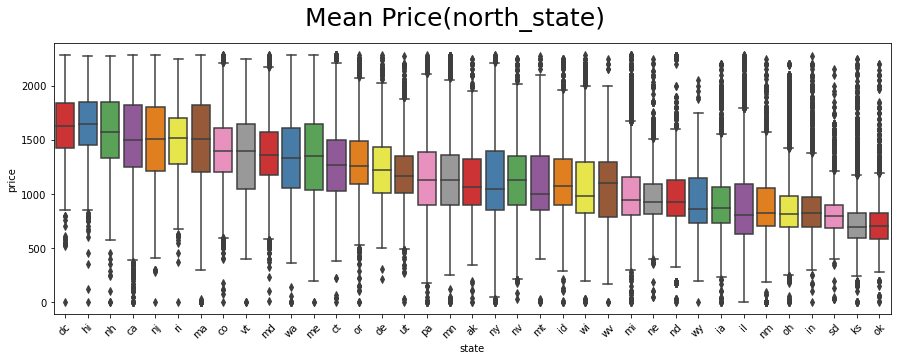

In [31]:
#создаем пространство для графика
fig = plt.figure(figsize=(15,5))

#группируем по северным штатам, считая среднюю стоимость жилья для каждого северного штата 
table = data_IQR_North.groupby(['state'], as_index=False)['price'].mean().sort_values(by='price', ascending=False)

#построение графиков
ax = sns.boxplot(data=data_IQR, x="state", y="price", order=table['state'].to_list(), palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.suptitle("Mean Price(north_state) ",fontsize=25);

Выдвинем гипотезу, что средняя цена жилья Северных штатов равна средней цене жилья Южных штатов.

$$H_0: m_S = m_N$$

$$H_1: m_S <> m_N$$

Исследуем распределения на нормальность. Воспользуемся **критерием Шапиро-Уилка**. Почему он? Потому что он один из самых мощных критериев и позволяет работать с выборкой данного размера. Выберем уровень значимости **alpha = 0.05**.

In [32]:
#критерий Шапиро-Уилка для южной выборки
stats.shapiro(data_IQR_South['price'])

D:\Anaconda\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9624394178390503, pvalue=0.0)


 mu = 1006.45 and sigma = 334.74



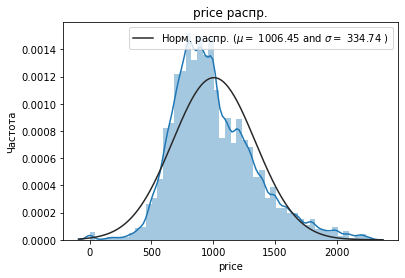

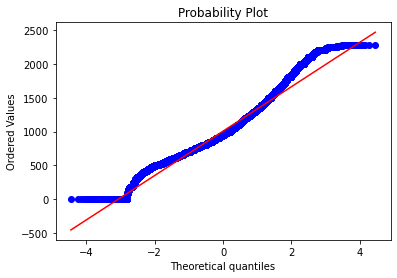

In [33]:
sns.distplot(data_IQR_South['price'] , fit=stats.norm);

(mu, sigma) = stats.norm.fit(data_IQR_South['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Норм. распр. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Частота')
plt.title('price распр.')

#QQ-plot
fig = plt.figure()
res = stats.probplot(data_IQR_South['price'], plot=plt)
plt.show()

In [34]:
#критерий Шапиро-Уилка для северной выборки
stats.shapiro(data_IQR_North['price'])

D:\Anaconda\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9762063026428223, pvalue=0.0)


 mu = 1163.32 and sigma = 427.39



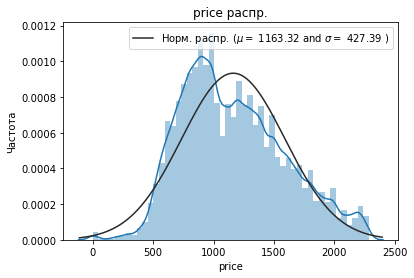

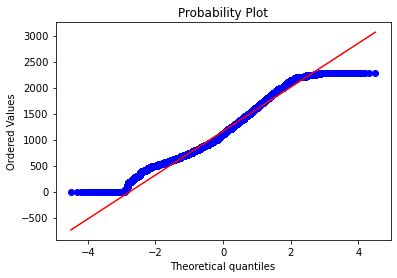

In [35]:
sns.distplot(data_IQR_North['price'] , fit=stats.norm);

(mu, sigma) = stats.norm.fit(data_IQR_North['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Норм. распр. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Частота')
plt.title('price распр.')

#QQ-plot
fig = plt.figure()
res = stats.probplot(data_IQR_North['price'], plot=plt)
plt.show()

Обе гипотезы о нормальном распределении **отвергаются**, потому что в обоих случаях p_value < 0.05

Так как распределения выборок **отличны от нормального**, то воспользуемся **критерием Манна-Уитни**

In [36]:
#критерий Манна-Уитни
stats.mannwhitneyu(data_IQR_South['price'], data_IQR_North['price'])

MannwhitneyuResult(statistic=13006955483.0, pvalue=0.0)

Гипотеза **отвергается**. Значит средние цены на жилье на Юге и Севере различаются.

# Выводы:

Исследовался набор данных о стоимости жилья в США. В процессе исследования была поставлена гипотеза о равенстве мат.ожиданий цен для разных типов жилья. Использовался однофакторный дисперсионный анализ, где фактором являлся тип жилья, результурющим признаком была цена. Гипотеза была отклонена, и с помощью критерия Тьюки, были найдены типы жилья, для которых выполнялось равенство мат.ожиданий. Затем была исследована зависимость цен на жилье от географического положения штата. Было выбрано разделение на южные и северные штаты. В южные штаты вошли те, которые воевали во время Гражданской войны 1861-1865 годов на стороне Конфедеративных Штатов Америки. В северные штаты вошли те, которые воевали на стороне Соединённых Штатов Америки. В процессе исследования была поставлена гипотеза о равенстве средних цен на жилье для Южных и Северных штатов. Использовался критерий Манна-Уитни, так как распределение выборок отлично от нормального. В итоге, средние цены на жилье в Южных и Северных штатах различные.